In [89]:
!pip3 install opencv-python
!pip3 install nibabel
!pip3 install itkwidgets

     ---------------------------------------- 3.4/3.4 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 23.8/23.8 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 36.3/36.3 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 683.5/683.5 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 107.5/107.5 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 271.6/271.6 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 19.8/19.8 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 511.6/511.6 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: notebook
    Found existing installation: notebook 6.5.2
    Uninstalling notebook-6.5.2:
      

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.27 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.27 requires PyYAML==6.0, but you have pyyaml 5.4.1 which is incompatible.


In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import nibabel as nib # supports a collection of neuroimaging file formats
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

import seaborn as sns
sns.set_style('darkgrid')

In [68]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, sli in enumerate(slices):
        axes[i].imshow(sli.T, cmap="gray", origin="lower")

In [69]:
sub_04_filename = os.path.join(os.getcwd(), "ds003688-download", "sub-04", "ses-mri3t", "func",\
                               "sub-04_ses-mri3t_task-film_run-1_bold.nii.gz")
sub_04 = nib.load(sub_04_filename)
sub_04_data = sub_04.get_fdata()
sub_04_data.shape

(40, 64, 64, 641)

In [70]:
slice_0 = sub_04_data[20, :, :, 100]
slice_1 = sub_04_data[:, 32, :, 100]
slice_2 = sub_04_data[:, :, 32, 100]

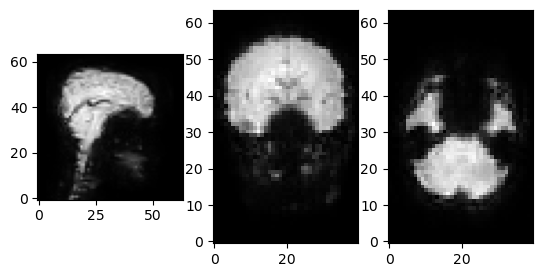

In [71]:
bshow_slices([slice_0, slice_1, slice_2])

In [81]:
sub_04_data_normalized = (sub_04_data - sub_04_data.min()) / (sub_04_data.max() - sub_04_data.min())
sub_04_data_reversed = 1 - sub_04_data_normalized

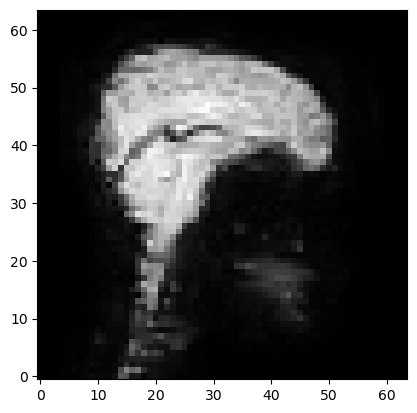

In [86]:
plt.imshow(sub_04_data_normalized[20, :, :, 100].T, cmap="gray", origin="lower")

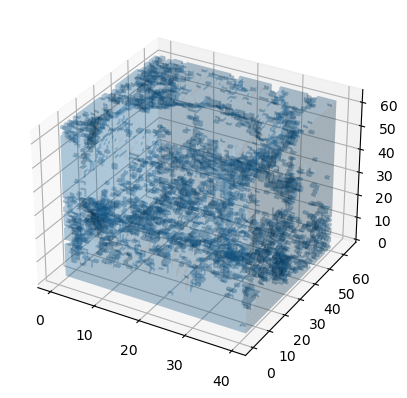

In [88]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(sub_04_data_normalized[:, :, :, 0], facecolors='#1f77b430');

In [93]:
def explore_3d_image(layer):
    plt.figure(figsize=(10, 15))
    plt.imshow(sub_04_data[:, :, layer, 100], cmap="gray")
    plt.title("Explore layers of brain fMRI", family="Arial", fontsize=20)
    plt.axis('off')
    return layer

In [94]:
interact(explore_3d_image, layer=(0, sub_04_data.shape[2] - 1))

interactive(children=(IntSlider(value=31, description='layer', max=63), Output()), _dom_classes=('widget-inter…

<function __main__.explore_3d_image(layer)>